In [11]:
# csce 487 intro to ML
# assignment 3 - Naive Bays Classifier & Logistic Regression
# collaborators : Changsu Kim, Jesse Reyes Cortes

import pandas as pd
import numpy as np
import math
import copy
import itertools
from random import sample 
import nltk
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
nltk.download('wordnet')
nltk.download('punkt')
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer



[nltk_data] Downloading package wordnet to /Users/Jesse/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/Jesse/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [12]:
#################             NAIVE BAYES CLASSIFIER             #################

# part A: model code (design multinomial naive bayes)

data_A = [[2, 2, 2, 2, 3, 2, 2],
          [22, 22, 33, 2 , 2, 2],
          [3, 2, 2, 2, 8, 4],
          [2, 2, 3,2, 2, 2,2, 2, 2, 3],
          [2,2,2,4, 2,6,2,5,4],
          [2, 2, 9, 2, 4, 2, 2, 2],
          [2,9, 7, 8 , 23, 43, 29, 28],
          [2, 2,2, 4,3, 5, 4, 2, 20, 24],
          [2, 4 ,3 ,2, 3, 2],
          [2, 2, 8, 2, 2, 2,3,53],
          [4, 34, 23, 23, 23,2],
          [2, 3,3,2, 3,4, 5,3, 4],
          [2, 4, 2, 3, 2, 4, 5],
          [22,43,23,23,43,34,23,23,5],
          [23, 8, 2, 2, 3, 4]
         ]
label_A = [1,0,1,0,1,1,0,1,0,1,1,0,0,1,0]

test_A = [[2,4, 4, 23, 4, 4, 4],
          [2, 3, 2, 3, 2, 3],
          [2,2,2,2,3,2,43,2,2],
          [3,2,3,2,2,3],
          [2,3,2,3,2,4,2,42],
          [23,4,2,32]]

test_A_labels = [0,0,1,0,1,0]

class Multinomial_NB:
    def __init__(self, alpha=1.0):
        self.X = np.array([])
        self.Y = np.array([])
        self.alpha = alpha
        self.prior_h = 0
        self.prior_s = 0
        self.h_total = 0
        self.s_total = 0
        
        
    def fit(self, X, Y, **kwargs):
        self.X = X
        self.Y = Y
        
        if "alpha" in kwargs:
            self.apha = kwargs["alpha"]
        
        h_count = 0
        s_count = 0
        
        for i in range(0, len(self.X)):
            c = "spam"
            
            # spam
            if(self.Y[i]==1):
                s_count = s_count + 1
                self.s_total = self.s_total + sum(self.X[i])
                c = "ham"
            # not spam
            else:
                h_count = h_count + 1
                self.h_total = self.h_total + sum(self.X[i])

       # store classes as pie             
        self.prior_h = h_count/(h_count + s_count)
        self.prior_s = s_count/(h_count + s_count)

        
        
    def predict(self, X):
        
        predict = []
        
        log_post = self.predict_log_proba(X)
        
        for i in range(0, len(X)):
         
            prob_s = math.log(self.prior_s) + log_post[i][0]
            prob_h = math.log(self.prior_s) + log_post[i][1]
                
            if(prob_s > prob_h):
                predict.append(1)
            else:
                predict.append(0)
                
        return predict
    
    
    
    def predict_log_proba(self, X):
        
        log_post = np.zeros((len(X),2))
        
        for i in range(0, len(X)):
            
            #predicting spam
            post_s = 0
            #predicting ham
            post_h = 0
            
            for j in X[i]:
                p_s = self.alpha + j
                p_h = self.alpha + j
                    
                post_s = post_s + math.log(p_s/self.s_total)
                post_h = post_h + math.log(p_h/self.h_total)
            
            log_post[i][0] = post_s
            log_post[i][1] = post_h
                
        return log_post
    
    

    def predict_prob(self, X):
        
        predict = []
        
        for i in range(0, len(X)):
            
            #predicting spam
            prob_s = 1
            #predicting ham
            prob_h = 1
            for j in X[i]:
                p_s = self.alpha
                p_h = self.alpha
                if str(j) in self.hashtable["spam"]:
                    p_s = p_s + self.hashtable["spam"][str(j)]
                if str(j) in self.hashtable["ham"]:
                    p_h = p_h + self.hashtable["ham"][str(j)]
                    
                prob_s = prob_s * (p_s/self.s_total)
                prob_h = prob_h * (p_h/self.h_total)
      
            prob_s = self.prior_s * p_s
            
            prob_h = self.prior_h * p_h
                
            if(prob_s > prob_h):
                predict.append(0)
                
            else:
                predict.append(1)
                
        return predict
        
        
model = Multinomial_NB()
model.fit(data_A, label_A)
Y_hat = model.predict(test_A)
print("Predicting(Log): ", Y_hat)

Predicting(Log):  [0, 0, 0, 0, 0, 0]


In [13]:
# part B: exploratory data analysis
# B.2 read in SMSSpamCollection.csv as DataFrame
df = pd.read_csv('SMSSpamCollection_copy', delimiter='\t');
df.columns = ['spam', 'text'] 
df['spam'] = np.where(df['spam'] == "spam", 1, 0) #broadcasting
df.head()
df.info()
print("Dimension of the data: ", df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5571 entries, 0 to 5570
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   spam    5571 non-null   int64 
 1   text    5571 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB
Dimension of the data:  (5571, 2)


In [14]:
# B.3 summerization of data in terms of mean, standard deviation, and quartiles
no_of_rows = df.shape[0]
no_of_columns = df.shape[1]

print("\nNo. of Rows: %d" % no_of_rows)
print("No. of Columns: %d" % no_of_columns)
df.groupby('spam').count()

df['length'] = df['text'].map(lambda text: len(text))
df.groupby('spam').length.describe()


No. of Rows: 5571
No. of Columns: 2


,count,mean,std,min,25%,50%,75%,max
spam,,,,,,,,
0,4824.0,71.474295,58.443940,2.0,33.0,52.0,93.0,910.0
1,747.0,138.670683,28.873603,13.0,133.0,149.0,157.0,223.0


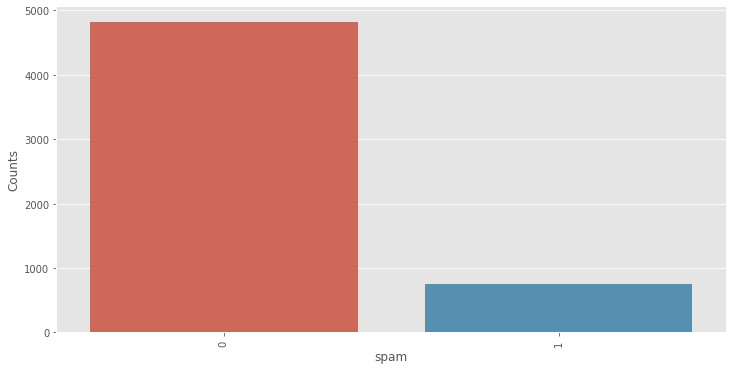

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

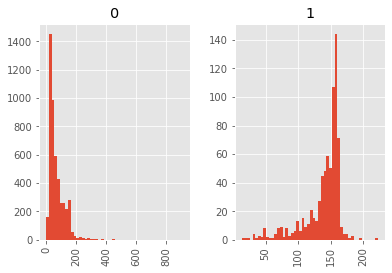

In [15]:
# B.4 generate plot to display class distribution
label_counts = df.spam.value_counts()
plt.figure(figsize = (12,6))
sns.barplot(label_counts.index, label_counts.values, alpha = 0.9)

plt.xticks(rotation = 'vertical')
plt.xlabel('spam', fontsize =12)
plt.ylabel('Counts', fontsize = 12)
plt.show()
#Create a new column "length" the stores the length of the text on each row
df['length'] = df['text'].map(lambda text: len(text))

df.groupby('spam').length.describe()
emails_subset = df[df.length < 1800]
emails_subset.hist(column='length', by='spam', bins=50)

In [16]:
# part C: Feature Extraction
# C.5 normalize text
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

df['text_lemmatized'] = df['text'].map(lambda text: ' '.join(lemmatizer.lemmatize(w) for w in nltk.word_tokenize(text.lower())))

df['stemming'] = df['text'].map(lambda text: ' '.join(stemmer.stem(w) for w in nltk.word_tokenize(text.lower())))

In [9]:
#Test Normalization
print(df['text'][10])
print("\nLemmatized Email:\n")
print(df['text_lemmatized'][10])

SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info

Lemmatized Email:

six chance to win cash ! from 100 to 20,000 pound txt > csh11 and send to 87575. cost 150p/day , 6days , 16+ tsandcs apply reply hl 4 info


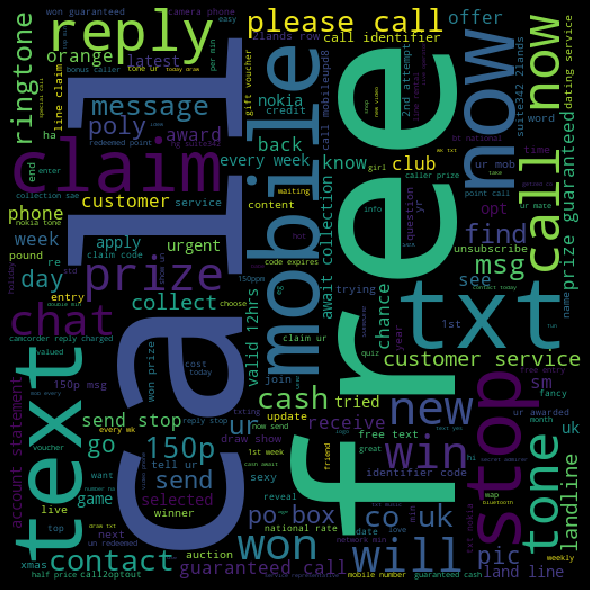

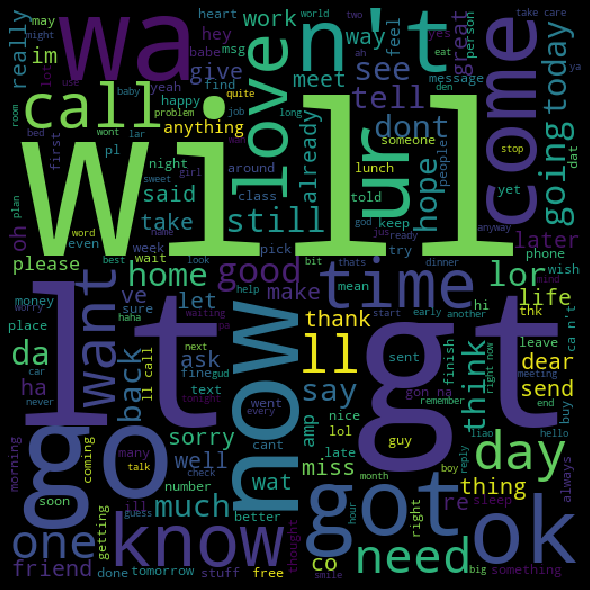

In [10]:
# C.6 generate word clouds for both spam and ham emails (NLTK lib)
spam_words = ''.join(list(df[df['spam']==1]['text_lemmatized']))
spam_wordcloud = WordCloud(width = 512,height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

spam_words = ''.join(list(df[df['spam']==0]['text_lemmatized']))
spam_wordcloud = WordCloud(width = 512,height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [20]:
# C.7 remove stop words & convert to numerical feature vectors
#print(stop_words.ENGLISH_STOP_WORDS)
x = shuffled['text_lemmatized']
y = shuffled['spam']
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

cv = CountVectorizer(lowercase=True, stop_words='english')
x_counts = cv.fit_transform(x)
print(x_counts.shape)
#print(x_counts)
#print(x_counts)
#x_train_counts = cv.fit_transform(x_train)
#print(x_train_counts.shape)
#x_test_counts = cv.transform(x_test)
#print(x_test_counts.shape)

#print(x_train_counts)

#tfidf = TfidfTransformer()
#x_train_tfidf = tfidf.fit_transform(x_train_counts)
#print(x_train_tfidf.shape)
#x_test_tfidf = tfidf.transform(x_test_counts)
#print(x_test_tfidf.shape)

(5571, 7961)


In [32]:
# C.8 create data
featureMatrix = cv.fit_transform(shuffled['text_lemmatized'])
targetVector = shuffled['spam']
#print(shuffled['text_lemmatized'][0])
#print(df)
print(featureMatrix)
print(targetVector)

  (0, 3770)	1
  (0, 6532)	1
  (1, 6452)	1
  (1, 877)	1
  (1, 6821)	1
  (1, 5513)	1
  (1, 3556)	1
  (1, 2132)	1
  (1, 7608)	1
  (1, 6138)	1
  (1, 3580)	2
  (1, 6715)	2
  (1, 6218)	1
  (1, 661)	1
  (2, 6218)	3
  (2, 6820)	1
  (2, 2031)	3
  (2, 2654)	1
  (2, 4439)	2
  (2, 5776)	1
  (2, 1976)	1
  (2, 6007)	1
  (2, 5745)	1
  (2, 4598)	1
  (2, 1768)	1
  :	:
  (5565, 7539)	1
  (5565, 1383)	1
  (5566, 7606)	1
  (5566, 4036)	1
  (5567, 5990)	1
  (5567, 3425)	1
  (5567, 4379)	1
  (5567, 6854)	1
  (5568, 5890)	1
  (5568, 5091)	1
  (5568, 4960)	1
  (5568, 2444)	1
  (5568, 4357)	1
  (5568, 7113)	1
  (5569, 4897)	1
  (5569, 7153)	1
  (5569, 6357)	1
  (5569, 4195)	1
  (5569, 1179)	1
  (5569, 2743)	1
  (5570, 2031)	1
  (5570, 1297)	1
  (5570, 3178)	1
  (5570, 3486)	1
  (5570, 1742)	1
5006    0
671     1
656     0
552     0
3274    0
       ..
3985    0
3308    0
4028    0
4383    0
2556    0
Name: spam, Length: 5571, dtype: int32


In [31]:
# C.9 shuffle rows of data 
shuffled = df.sample(frac=1)
#print(df['text_lemmatized'])
print(df)
print('-----------------------------------------------------------------------------------------')
#print(shuffled['text_lemmatized'])
print(shuffled)

      spam                                               text  length  \
0        0                      Ok lar... Joking wif u oni...      29   
1        1  Free entry in 2 a wkly comp to win FA Cup fina...     155   
2        0  U dun say so early hor... U c already then say...      49   
3        0  Nah I don't think he goes to usf, he lives aro...      61   
4        1  FreeMsg Hey there darling it's been 3 week's n...     147   
...    ...                                                ...     ...   
5566     1  This is the 2nd time we have tried 2 contact u...     160   
5567     0               Will ü b going to esplanade fr home?      36   
5568     0  Pity, * was in mood for that. So...any other s...      57   
5569     0  The guy did some bitching but I acted like i'd...     125   
5570     0                         Rofl. Its true to its name      26   

                                        text_lemmatized  
0                       ok lar ... joking wif u oni ...  
1     f

In [14]:
#Test Normalization
print("Test for lemmantization & stemming:")
print(df['text'][10])
print("\nLemmatized Email:\n")
print(df['text_lemmatized'][10])
print("\nStemmed Email:\n")
print(df["stemming"][10])


Test for lemmantization & stemming:
SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info

Lemmatized Email:

six chance to win cash ! from 100 to 20,000 pound txt > csh11 and send to 87575. cost 150p/day , 6days , 16+ tsandcs apply reply hl 4 info

Stemmed Email:

six chanc to win cash ! from 100 to 20,000 pound txt > csh11 and send to 87575. cost 150p/day , 6day , 16+ tsandc appli repli hl 4 info


In [15]:
# C.10 partition data (80% train - 20% test)
partition(featureMatrix, targetVector, .20)

[<4456x7961 sparse matrix of type '<class 'numpy.int64'>'
 	with 34599 stored elements in Compressed Sparse Row format>,
 <1114x7961 sparse matrix of type '<class 'numpy.int64'>'
 	with 8792 stored elements in Compressed Sparse Row format>,
 515     0
 4630    0
 2152    0
 908     0
 4890    0
        ..
 4043    0
 3120    0
 3381    1
 5339    0
 928     0
 Name: spam, Length: 4456, dtype: int32,
 5366    0
 3863    1
 237     0
 4306    0
 256     0
        ..
 634     1
 617     0
 3964    0
 4752    0
 1041    0
 Name: spam, Length: 1114, dtype: int32]

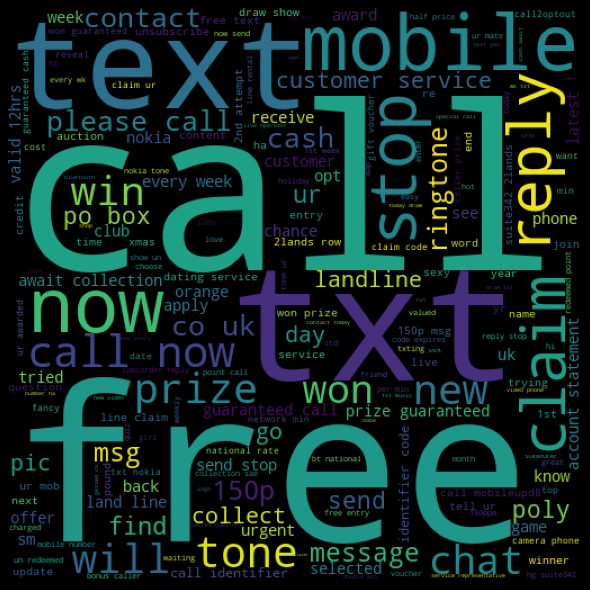

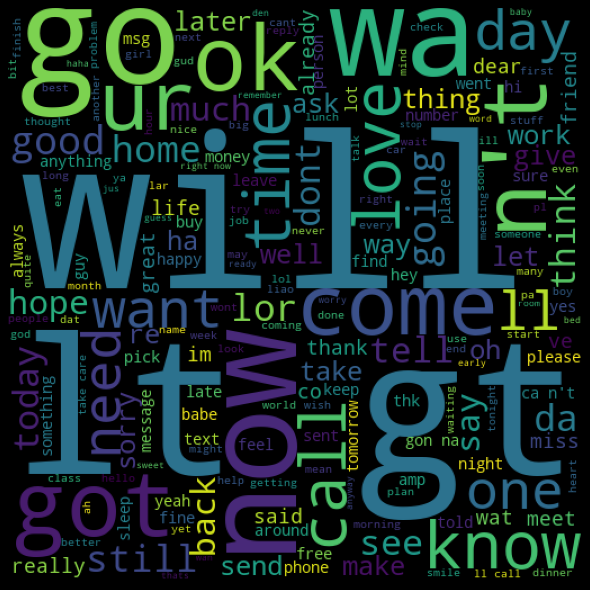

In [71]:
# C.6 generate word clouds for both spam and ham emails (NLTK lib)
spam_words = ''.join(list(df[df['spam']==1]['text_lemmatized']))
spam_wordcloud = WordCloud(width = 512,height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

spam_words = ''.join(list(df[df['spam']==0]['text_lemmatized']))
spam_wordcloud = WordCloud(width = 512,height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [19]:
# C.7 remove stop words & convert to numerical feature vectors

cv = CountVectorizer(lowercase=True, stop_words='english')
X_lem = cv.fit_transform(df["text_lemmatized"])
X_stem = cv.fit_transform(df["stemming"])

print(X_lem.toarray())


# tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True) 
# X_lem = tfidf_transformer.fit_transform(X_lem).toarray()
# X_stem = tfidf_transformer.fit_transform(X_stem).toarray()

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [15]:
# C.8 create data
# featureMatrix = cv.fit_transform(shuffled['text_lemmatized'])
# targetVector = shuffled['spam']
# #print(shuffled['text_lemmatized'][0])
# #print(df)
# print(featureMatrix)
# print(targetVector)



df_lem = np.zeros((5571,(1+len(X_lem[0]))))
for i in range(0,len(df["spam"])):
    df_lem[i] = np.append(df["spam"][i], X_lem[0])

df_lem = pd.DataFrame(df_lem)
    
df_stem = np.zeros((5571,(1+len(X_lem[0]))))
for i in range(0,len(df["spam"])):
    df_stem[i] = np.append(df["spam"][i], X_lem[0])
    
df_stem = pd.DataFrame(df_stem)

print(np.array(df_stem))


[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [14]:
# C.9 shuffle rows of data 
shuffled = df.sample(frac=1)
print(df)
print('-----------------------------------------------------------------------------------------')
print(shuffled)

df_lem = df_lem.sample(frac=1)
df_stem = df_stem.sample(frac=1)

      spam                                               text  \
0        0                      Ok lar... Joking wif u oni...   
1        1  Free entry in 2 a wkly comp to win FA Cup fina...   
2        0  U dun say so early hor... U c already then say...   
3        0  Nah I don't think he goes to usf, he lives aro...   
4        1  FreeMsg Hey there darling it's been 3 week's n...   
...    ...                                                ...   
5566     1  This is the 2nd time we have tried 2 contact u...   
5567     0               Will ü b going to esplanade fr home?   
5568     0  Pity, * was in mood for that. So...any other s...   
5569     0  The guy did some bitching but I acted like i'd...   
5570     0                         Rofl. Its true to its name   

                                        text_lemmatized  \
0                       ok lar ... joking wif u oni ...   
1     free entry in 2 a wkly comp to win fa cup fina...   
2     u dun say so early hor ... u c alrea

In [13]:
# C.10 partition data (80% train - 20% test)
def partition(X, t): #take 3 arguments(numpy array with rows representing data samples and columns represeting features)
    test_size = math.ceil(len(X)*t)
    train_data = X[0:test_size]
    test_data = X[test_size:len(X)]
    
    return [train_data, test_data]

lem_data = partition(df_lem, .80)
stem_data = partition(df_stem, .80)


In [148]:
#Part D.
#11 Model selection via Hyper-parameter tuning
def precision(x,y):
    truePositive = 0
    falsePositive = 0
    for i in range(0, len(x)):
        if(x[i] == 1 and .5 < y[i]):
            truePositive = truePositive + 1
        elif(x[i] == 0 and .5 < y[i]):
            falsePositive = falsePositive + 1
    return truePositive/(truePositive+falsePositive)


def recall(x,y):
    truePositive = 0
    falseNegative = 0
    for i in range(0, len(x)):
        if(x[i] == 1 and .5 < y[i]):
            truePositive = truePositive + 1
        elif(x[i] == 0 and y[i] <= .5):
            falseNegative = falseNegative + 1
    return truePositive/(truePositive+falseNegative)


def f1(x,y):
    return (precision(x,y)+recall(x,y))/(precision(x,y)+recall(x,y))


def confusion_matrix(x,y):
    TN = 0
    FP = 0
    FN = 0
    TP = 0
    for i in range(0, len(x)):
        if(x[i]==0 and y[i] <= .5):
            TN = TN + 1
        elif(x[i]==0 and .5 < y[i]):
            FP = FP + 1
        elif(x[i]==1 and y[i] <= .5):
            FN = FN + 1
        elif(x[i]==1 and .5 < y[i]):
            TP = TP + 1

    return [[TN, FP],[FN, TP]]




alpha = [0.0001, 0.001, 0.01, 0,1, 0.5, 1.0, 1.5, 2.0]      #hyperparameter

# lem & stem data
data = [lem_data, stem_data]

score = []

dict = {"precision": [], "recall": [], "f1 score": [], "confusion matrix": []}

model = Multinomial_NB()

for dat in data:
    for j in alpha:                                                 #loop hyperparameter and 
        train = np.array(dat[0])
        test = np.array(dat[1])
        
        X = train[:,1:]
        Y = train[:,0]
        test_X = test[:,1:]
        test_Y = test[:,0]
        
        model.fit(X,Y, alpha = j)
        Y_hat = model.predict(test_X)
        print(Y_hat)
        
        



[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [138]:
# D.12 generate ROC and AUC (bonus)


In [21]:
# D.13 evaluate model on test day (Precision, Recall, F1 score, Confusion matrix, Accuracy)


In [22]:
# D.14 multivariate bernoulli naive bayes model (bonus)


In [23]:
#################      LOGISTIC REGRESSION: MULTI-CLASS CLASSIFICATION      #################
# part A: model code
# A.15 design softmax  regression classifier
def one_hot_label(Y):
    W = []
    for i in Y:
        if i == 0:
            W.append([1, 0, 0])
        elif i == 1:
            W.append([0, 1, 0])
        else:
            W.append([0, 0, 1])
        Y_one_hot = np.array(W)
    return Y_one_hot

y = [0,1,2,0,2,0,1,2,1,1]
print("Testing one_hot_label: ", one_hot_label(y))

Testing one_hot_label:  [[1 0 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]]


In [24]:
# A.16 compute softmax score 

def softmax(score):
    Y_prob = []
    
    
    
    for i in score:
        exp_sum = 0
        for j in i:
            exp_sum = exp_sum + math.exp(j)
        y_tmp = np.array([])
        for j in i:
            y_tmp = np.append(y_tmp, [(math.exp(j)/exp_sum)])
            
        Y_prob.append(y_tmp)
        
    return np.array(Y_prob)
    
    
    
score = [[3,1,2],
         [2,2,2],
         [3,2,9],
         [2,0,4],
         [2,4,9],
         [3,2,0],
         [2,4,8]]

print("Testing Softmax: ", softmax(score))

Testing Softmax:  [[6.65240956e-01 9.00305732e-02 2.44728471e-01]
 [3.33333333e-01 3.33333333e-01 3.33333333e-01]
 [2.47037604e-03 9.08800555e-04 9.96620823e-01]
 [1.17310428e-01 1.58762400e-02 8.66813332e-01]
 [9.04959183e-04 6.68679417e-03 9.92408247e-01]
 [7.05384513e-01 2.59496460e-01 3.51190270e-02]
 [2.42825803e-03 1.79425348e-02 9.79629207e-01]]


In [25]:
# A.17 implement function to compute the cross-entropy loss
def cross_entropy_loss(Y_one_hot, Y_proba):
    cost = 0.0
    
    for i in range(0, len(Y_proba)):
        for j in range(0, len(Y_proba[0])):
                       cost = cost + (Y_one_hot[i][j]*math.log(Y_proba[i][j]))
                
    return -1*cost
                       

y_hot =[[1,0,0],
        [1,0,0],
        [0,1,0],
        [0,0,1],
        [0,0,1],
        [0,1,0],
        [1,0,0]]
                       
y_prob =[[.23,.23,.32],
        [.23,.34,.08],
        [.03,.28,.234],
        [.284,.294,.0384],
        [.0483,.84,.483],
        [.294,.38,.84],
        [.84,.342,.284]]

print("Testing Cross entropy loss: ", cross_entropy_loss(y_hot, y_prob))

Testing Cross entropy loss:  9.341691474055276


In [26]:
# A.18 implement a softmax_regression model class
class Softmax_Regression():
        def __init__(self):
            self.X = np.array([])
            self.Y = np.array([])
            self.learning_rate = 0
            self.epochs = 0
            self.tol = None
            self.regularizer = None
            self.lambd = 0.0
            self.early_stopping = False
            self.validation_fraction = 0.1
            
            
        def fit(self, X, Y, learning_rate=0.01, epochs=1000, tol=None, regularizer=None, lambd=0.0, early_stopping=False, validation_fraction=0.1, **kwargs):
            self.X = X
            self.Y = Y
            self.learning_rate = learning_rate
            self.epochs = epochs
            self.tol = tol
            self.regularizer = regularizer
            self.lambd = lambd
            self.early_stopping = early_stopping
            self.validation_fraction = validation_fraction
            
            
        def predict(self, X):
            print(X)
            
            
            

            

In [27]:
# B.19 read iris data (use sklearn.datasets.load_iris)
from sklearn.datasets import load_iris

data = pd.DataFrame(load_iris()["data"])

label = pd.DataFrame(load_iris()["target"])

In [28]:
# B.20 summerize variables in terms of mean, standard deviation, and quartiles (use technique from 2nd recitation)
data.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [29]:
# B.21 shuffle rows of data
data=data.sample(frac=1)

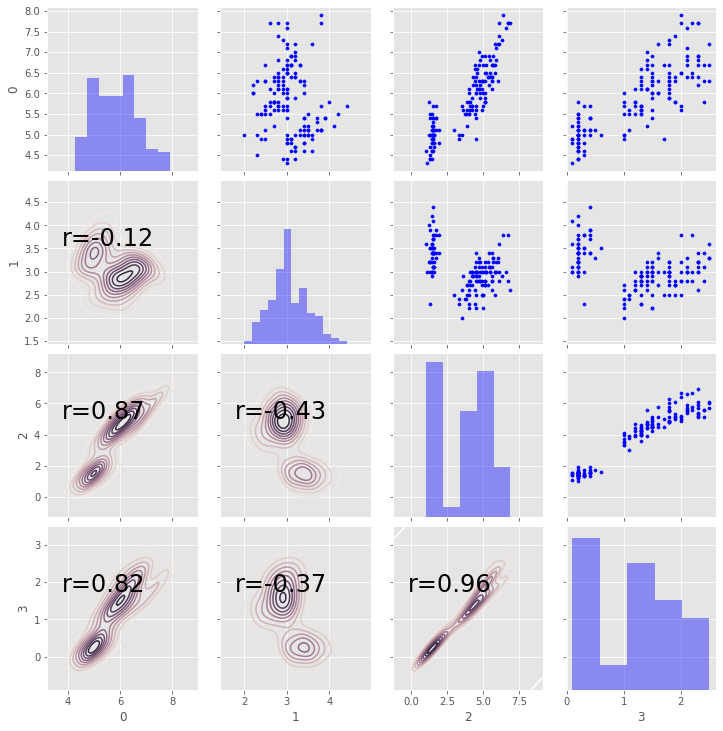

In [30]:
# B.22 generate plots (seaborn)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from scipy import stats

def corrfunc(x,y, **kws):
   r,_= stats.pearsonr(x,y)
   ax = plt.gca()
   ax.annotate("r={:.2f}".format(r), xy =(.1,.6), xycoords = ax.transAxes, size = 24)
cmap = sns.cubehelix_palette(light = 1, dark = 0.1, hue = 0.5, as_cmap = True)
sns.set_context(font_scale=2)
#Pair grid set up
g = sns.PairGrid(data)
#Scatter plot on the upper triangle
g.map_upper(plt.scatter, s = 10, color = 'blue')
#Distribution on the diagonal
g.map_diag(sns.distplot, kde = False, color = 'blue')
#Density Plot and Correlation coefficients on the lower triangle
g.map_lower(sns.kdeplot, cmap = cmap)
g.map_lower(corrfunc);

In [31]:
# B.23 scale the features
data = (data - data.mean())/data.std()

In [32]:
# B.24 partion data
k =  int(abs(.8 * len(data)))
train_X = data[0:k]
test_X = data[k:len(data)]
train_Y = data[0:k]
test_Y = data[k:len(label)]
print("Training data size: ", len(train_X))
print("Test data size: ", len(test_X))
print("Training label size: ", len(train_Y))
print("Test label size: ", len(test_Y))

Training data size:  120
Test data size:  30
Training label size:  120
Test label size:  30


In [33]:
# part C: Model Evaluation
# C.25 model selection via hyper-parameter tuning


In [34]:
# C.26 evaluate model on test data & report accuracy & confusion matrix


In [35]:
# C.27 implement early stop in "fit" method for softmax regression model (bonus)


In [36]:
# C.28 implement stochastic gradient descent logistic regression algorithm (bonus)